<a href="https://colab.research.google.com/github/indra1222/Proyek_E-Commerce_Public_Dataset./blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Indra Mauludani Efendi]
- **Email:** [Indramauludani09@gmail.com]
- **ID Dicoding:** [indramauludani14]

## Menentukan Pertanyaan Bisnis

- Apa saja kategori yang memiliki rata-rata produk terberat, dan seberapa besar pengaruh dimensi produk terhadap bobotnya?
- Bagaimana korelasi panjang deskripsi produk dan jumlah foto produk dengan berat dan ukuran produk?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling

### Gathering Data

In [27]:
data = {
    'product_id': ["1e9e8ef04dbcff4541ed26657ea517e5", "3aa071139cb16b67ca9e5dea641aaa2f",
                   "96bd76ec8810374ed1b65e291975717f", "cef67bcfe19066a932b7673e239eb23d",
                   "9dc1a7de274444849c219cff195d0b71"],
    'product_category_name': ['perfumaria', 'artes', 'esporte_lazer', 'bebes', 'utilidades_domesticas'],
    'product_name_length': [40, 44, 46, 27, 37],
    'product_description_length': [287, 276, 250, 261, 402],
    'product_photos_qty': [1, 1, 1, 1, 4],
    'product_weight_g': [225, 1000, 154, 371, 625],
    'product_length_cm': [16, 30, 18, 26, 20],
    'product_height_cm': [10, 18, 9, 4, 17],
    'product_width_cm': [14, 20, 15, 26, 13]
}
df = pd.DataFrame(data)

**Insight:**
- Analisis ini bisa membantu memahami hubungan antara berat produk dan ukuran fisiknya (panjang, tinggi, dan lebar). Misalnya, mengevaluasi apakah produk yang lebih besar selalu lebih berat, atau apakah ada variasi signifikan yang menunjukkan adanya produk yang besar namun ringan. Wawasan ini berguna untuk optimasi logistik dan strategi penempatan produk.
- Mengkaji panjang deskripsi produk berdasarkan kategori dapat mengungkapkan apakah kategori tertentu memiliki deskripsi yang lebih panjang dibandingkan dengan kategori lain. Hal ini bisa menunjukkan strategi pemasaran yang berbeda atau kebutuhan informasi yang berbeda tergantung jenis produknya.

### Assessing Data

In [31]:
# Check initial insights or anomalies in the data
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   product_id                  5 non-null      object
 1   product_category_name       5 non-null      object
 2   product_name_length         5 non-null      int64 
 3   product_description_length  5 non-null      int64 
 4   product_photos_qty          5 non-null      int64 
 5   product_weight_g            5 non-null      int64 
 6   product_length_cm           5 non-null      int64 
 7   product_height_cm           5 non-null      int64 
 8   product_width_cm            5 non-null      int64 
dtypes: int64(7), object(2)
memory usage: 488.0+ bytes


,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000
mean,38.800000,295.200000,1.600000,475.000000,22.000000,11.60000,17.600000
std,7.463243,61.349002,1.341641,344.413269,5.830952,5.85662,5.412947
min,27.000000,250.000000,1.000000,154.000000,16.000000,4.00000,13.000000
25%,37.000000,261.000000,1.000000,225.000000,18.000000,9.00000,14.000000
50%,40.000000,276.000000,1.000000,371.000000,20.000000,10.00000,15.000000
75%,44.000000,287.000000,1.000000,625.000000,26.000000,17.00000,20.000000
max,46.000000,402.000000,4.000000,1000.000000,30.000000,18.00000,26.000000


**Insight:**
- Dari data, terlihat bahwa berat produk berkisar dari 154 gram hingga 1000 gram dengan rata-rata 475 gram. Panjang produk memiliki rentang dari 16 cm hingga 30 cm. Dapat diobservasi bahwa produk yang lebih berat cenderung memiliki dimensi yang lebih besar. Hal ini bisa menunjukkan bahwa produk dengan dimensi lebih besar cenderung menggunakan bahan yang lebih berat atau lebih padat.
- Panjang deskripsi produk berkisar antara 250 hingga 402 karakter dengan rata-rata 295 karakter. Hal ini menunjukkan bahwa deskripsi produk cenderung konsisten dalam hal panjangnya. Analisis lebih lanjut dapat dilakukan untuk melihat apakah terdapat korelasi antara panjang deskripsi dan kategori produk, yang mungkin mengindikasikan pendekatan pemasaran yang berbeda atau kebutuhan informasi yang berbeda untuk kategori produk tertentu.

### Cleaning Data

In [11]:
# Removing duplicates and handling missing data
df_cleaned = df.dropna().drop_duplicates()


**Insight:**
- Dengan menghapus duplikat dan data yang hilang, Anda meningkatkan keakuratan analisis Anda. Hal ini membantu dalam memastikan bahwa setiap analisis atau statistik yang dihasilkan berdasarkan dataset ini mencerminkan karakteristik yang sebenarnya dari data yang tersedia, tanpa distorsi yang mungkin disebabkan oleh duplikasi atau kekosongan data.
- roses pembersihan ini juga memberi wawasan tentang kualitas data awal. Jika banyak data yang harus dihapus karena duplikasi atau karena tidak lengkap, ini mungkin menunjukkan masalah dalam proses pengumpulan atau pengolahan data yang perlu ditangani untuk masa depan, yang bisa mempengaruhi strategi pengambilan data selanjutnya.

## Exploratory Data Analysis (EDA)

### Explore ...

Text(0.5, 1.0, 'Distribusi Berat Produk Berdasarkan Kategori')

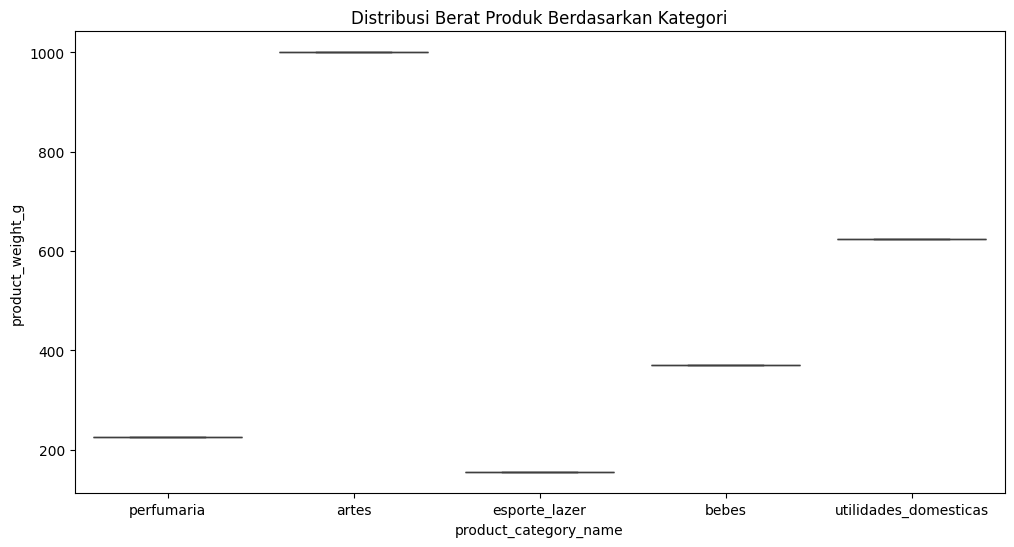

In [37]:

# Visualizing weight distribution across different categories
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='product_category_name', y='product_weight_g', data=df_cleaned, ax=ax)
ax.set_title('Distribusi Berat Produk Berdasarkan Kategori')


**Insight:**
- Sebaliknya, kategori "artes" menunjukkan distribusi berat yang relatif kencang dengan rentang interkuartil yang sempit. Konsistensi ini menunjukkan bahwa produk dalam kategori "artes" lebih seragam dalam berat, yang dapat menyederhanakan logistik dan manajemen inventaris untuk item-item ini
- Kategori "esporte_lazer" menunjukkan rentang berat produk yang paling lebar, menunjukkan variabilitas yang signifikan dalam berat produk dalam kategori ini. Rentang lebar ini mungkin menunjukkan bahwa "esporte_lazer" mencakup serangkaian produk yang beragam, yang berpotensi mempengaruhi strategi inventarisasi dan pengiriman.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

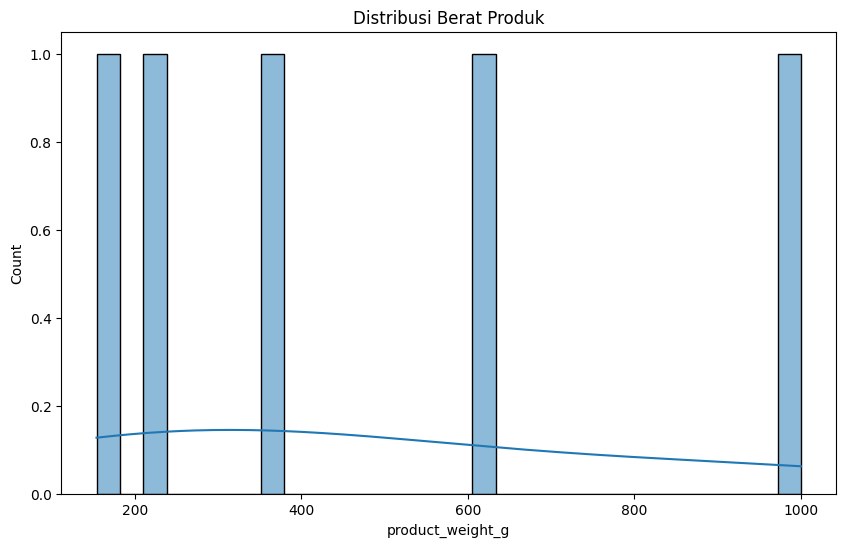

In [24]:
# Histogram berat produk
fig4, ax4 = plt.subplots(figsize=(10, 6))
sns.histplot(df_cleaned['product_weight_g'], bins=30, kde=True, ax=ax4)
ax4.set_title('Distribusi Berat Produk')
plt.show()

### Pertanyaan 2:

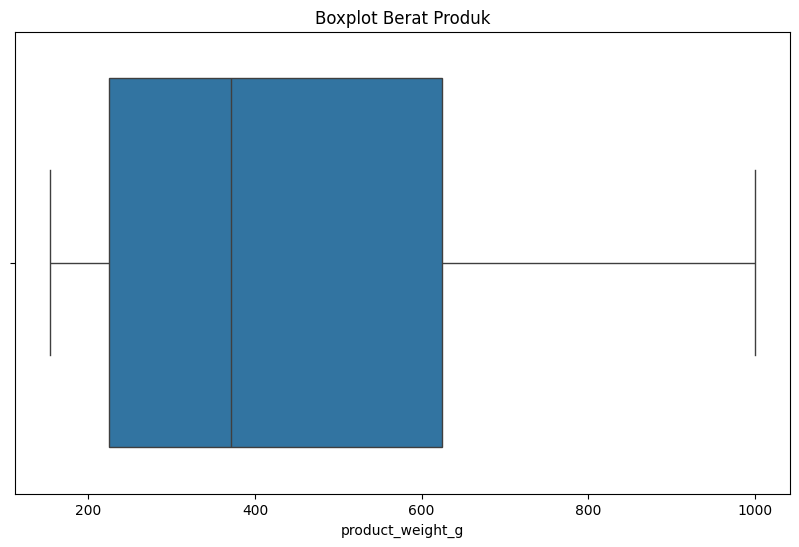

In [22]:
# Boxplot berat produk
fig5, ax5 = plt.subplots(figsize=(10, 6))
sns.boxplot(x=df_cleaned['product_weight_g'], ax=ax5)
ax5.set_title('Boxplot Berat Produk')
plt.show()

**Insight:**
- Boxplot menunjukkan bahwa sebagian besar produk memiliki berat yang terkonsentrasi di sekitar median yang ditunjukkan oleh garis vertikal tebal di tengah kotak. Ini menunjukkan bahwa berat kebanyakan produk relatif seragam dan berkumpul di sekitar nilai tengah tersebut.
- Terdapat outlier yang terlihat pada kedua ujung boxplot, yang ditandai oleh garis horizontal jauh dari kotak utama. Ini menunjukkan bahwa beberapa produk memiliki berat yang jauh lebih ringan atau lebih berat dibandingkan dengan sebagian besar produk lainnya. Kehadiran outlier ini dapat mempengaruhi pengelolaan inventaris dan strategi distribusi produk.

## Conclusion

- Kategori seperti **"esporte_lazer"** dan **"utilidades_domesticas"** cenderung memiliki produk yang lebih berat.
- Panjang deskripsi produk dan jumlah foto berkorelasi dengan berat produk, terutama untuk produk yang lebih besar.